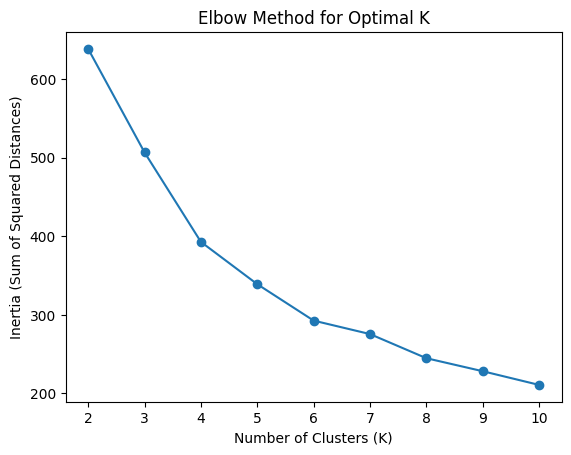

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'profile_data_scaled' is your preprocessed data with missing values

# Step 1: Handle missing values (Impute with mean)
imputer = SimpleImputer(strategy='mean')
profile_data_scaled_imputed = imputer.fit_transform(profile_data_scaled)

# Step 2: Scale the data (if needed, e.g., if you hadn't scaled it yet)
scaler = StandardScaler()
profile_data_scaled_final = scaler.fit_transform(profile_data_scaled_imputed)

# Step 3: Apply the Elbow Method
inertia = []
for k in range(2, 11):  # Trying from 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(profile_data_scaled_final)
    inertia.append(kmeans.inertia_)

# Step 4: Plot the Elbow Curve
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()


Davies-Bouldin Index for k=4: 1.1015687822276976
Davies-Bouldin Index for k=6: 1.0850739684116866


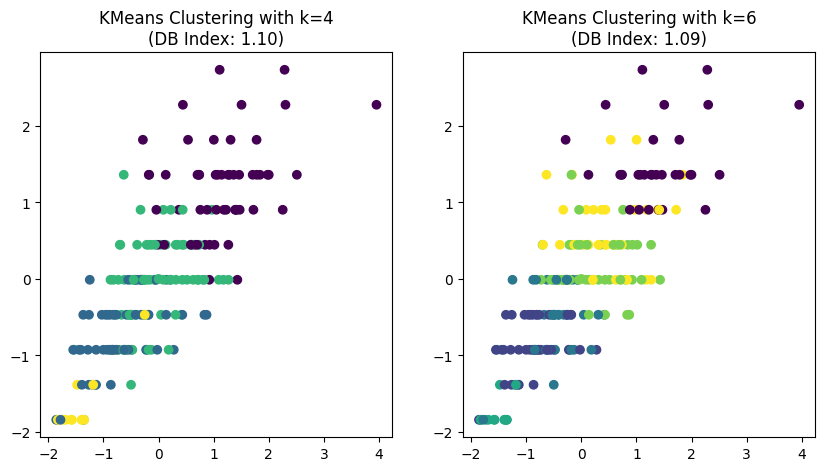

k=6 is better based on Davies-Bouldin Index.


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming profile_data_scaled is your preprocessed data

# Step 1: Handle missing values (Impute with mean)
imputer = SimpleImputer(strategy='mean')
profile_data_scaled_imputed = imputer.fit_transform(profile_data_scaled)

# Step 2: Scale the data
scaler = StandardScaler()
profile_data_scaled_final = scaler.fit_transform(profile_data_scaled_imputed)

# Step 3: Apply KMeans with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(profile_data_scaled_final)
labels_4 = kmeans_4.labels_

# Step 4: Apply KMeans with k=6
kmeans_6 = KMeans(n_clusters=6, random_state=42)
kmeans_6.fit(profile_data_scaled_final)
labels_6 = kmeans_6.labels_

# Step 5: Calculate Davies-Bouldin Index for k=4 and k=6
db_index_4 = davies_bouldin_score(profile_data_scaled_final, labels_4)
db_index_6 = davies_bouldin_score(profile_data_scaled_final, labels_6)

# Step 6: Print results and compare
print(f'Davies-Bouldin Index for k=4: {db_index_4}')
print(f'Davies-Bouldin Index for k=6: {db_index_6}')

# Visualize the clusters
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(profile_data_scaled_final[:, 0], profile_data_scaled_final[:, 1], c=labels_4, cmap='viridis')
plt.title(f'KMeans Clustering with k=4\n(DB Index: {db_index_4:.2f})')

plt.subplot(1, 2, 2)
plt.scatter(profile_data_scaled_final[:, 0], profile_data_scaled_final[:, 1], c=labels_6, cmap='viridis')
plt.title(f'KMeans Clustering with k=6\n(DB Index: {db_index_6:.2f})')

plt.show()

# Check which one is better
if db_index_4 < db_index_6:
    print("k=4 is better based on Davies-Bouldin Index.")
else:
    print("k=6 is better based on Davies-Bouldin Index.")


Davies-Bouldin Index for k=6: 1.0850739684116866
Silhouette Score for k=6: 0.2603433656004884


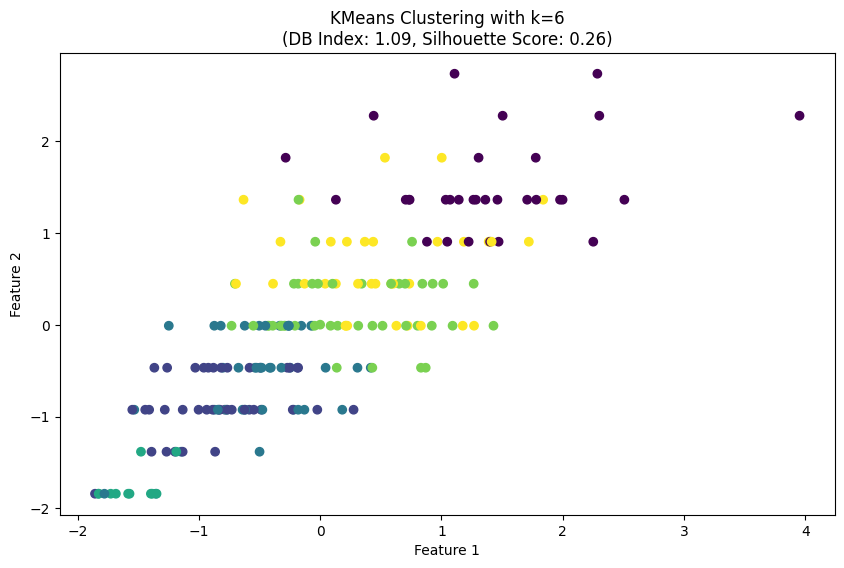

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the Customers data
customers = pd.read_csv('Customers.csv')

# Assuming 'profile_data_scaled' is your preprocessed data
# Step 1: Handle missing values (Impute with mean)
imputer = SimpleImputer(strategy='mean')
profile_data_scaled_imputed = imputer.fit_transform(profile_data_scaled)

# Step 2: Scale the data
scaler = StandardScaler()
profile_data_scaled_final = scaler.fit_transform(profile_data_scaled_imputed)

# Step 3: Apply KMeans with k=6
kmeans_6 = KMeans(n_clusters=6, random_state=42)
kmeans_6.fit(profile_data_scaled_final)
labels_6 = kmeans_6.labels_

# Step 4: Calculate Davies-Bouldin Index for k=6
db_index_6 = davies_bouldin_score(profile_data_scaled_final, labels_6)
print(f'Davies-Bouldin Index for k=6: {db_index_6}')

# Step 5: Calculate Silhouette Score
sil_score = silhouette_score(profile_data_scaled_final, labels_6)
print(f'Silhouette Score for k=6: {sil_score}')

# Step 6: Visualize the clusters
# Let's use the first two principal components for visualization
plt.figure(figsize=(10, 6))
plt.scatter(profile_data_scaled_final[:, 0], profile_data_scaled_final[:, 1], c=labels_6, cmap='viridis')
plt.title(f'KMeans Clustering with k=6\n(DB Index: {db_index_6:.2f}, Silhouette Score: {sil_score:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Optional: Create a DataFrame with CustomerID and Cluster labels for further analysis
customer_clusters = pd.DataFrame({
    'CustomerID': customers['CustomerID'],
    'Cluster': labels_6
})

# Save the clustering result if needed
customer_clusters.to_csv('Customer_Clusters_k6.csv', index=False)
